<a href="https://colab.research.google.com/github/PrishaAggarwal/Conversational_AI_All_cources/blob/main/Accelerated_Data_Science/Lab/My_files_Colab/Convo_AI_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PCA from strach
#Its very imp that the data must be centred around the mean
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target

<Axes: >

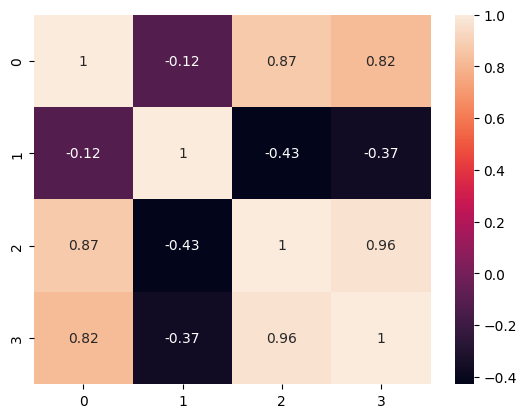

In [ ]:
import seaborn as sns
sns.heatmap(np.corrcoef(x,rowvar=False),annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [ ]:
cov=np.cov(x_scaled,rowvar=False)
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
values,vectors = np.linalg.eig(cov)

In [ ]:
values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
explained_variance=[]
for value in values:
  explained_variance.append((value*100)/sum(values))
explained_variance

[np.float64(72.96244541329987),
 np.float64(22.85076178670177),
 np.float64(3.668921889282864),
 np.float64(0.5178709107154906)]

In [ ]:
X1=x_scaled.dot(vectors.T[0])
X2=x_scaled.dot(vectors.T[1])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit_transform(x_scaled)
pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
pca.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

In [ ]:
#LDA from skratch
#iske liye it is imp to have labelled dataset...lets take iris dataset only
#LDA mein not imp ki mean ke around centered ho
#between class scatterness ka function bana rhe hai
#sabse phele we will find mu i.e global mean..mean of entire input features
def between_scatter(X,Y):
  global_mean=X.mean(axis=0) #gives mean of all features by calculating mean across rows
  labels=np.unique(Y) #we come to know the unique labels
  n,k=X.shape #gives number of rows and columns
  sb=np.zeros((k,k)) #feature*feature matrix hoga and sabko zero kr diya initialise
  for label in labels:
    #ek ek krke har class uthayenge..we get local mean with all classes with label 0
      X_subset=X[Y==label] #equality wala hume true false dega and X mein se we get index jo jo true hai
      local_mean = X_subset.mean(axis=0) #vase by default it finds the rows ka mean hi
      diff1=global_mean-local_mean #local_mean-gloabl_mean krlo chahe..farak nhi padhta since sq krna hai
      #now we want number of elements in that class i.e ni
      #row vextors hone chahiye Mu so we have to reshape the diff wala
      diff=np.array(diff1).reshape(1,k)
      n_elements = X_subset.shape[0]
      sb += n_elements*diff.T.dot(diff)
  return sb

In [ ]:
between_scatter(x,y) #ismien we have to take original x and agar values sahi nhi aati then original x rereun kr lena

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [ ]:
#finding within class scatterness
#os class ke har element ko oske class mean se subtract kr denge
def within_scatter(X,Y):
  n,k=X.shape
  sw = np.zeros((k,k))
  labels = np.unique(Y)
  for label in labels:
    X_subset = X[Y==label]
    local_mean = np.array(X_subset.mean(axis=0)).reshape(1,k)
    diff =np.array(X_subset-local_mean).reshape(1,k)
    sw += diff.T@diff
  return sw

In [ ]:
Sw=within_scatter(X1,y)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
Sw

NameError: name 'sw' is not defined

In [ ]:
cov = np.linalg.inv(sw).dot(sb) #jo sw inverse krte hai and multiply by sb

NameError: name 'sw' is not defined

In [ ]:
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
values,vectors=np.linalg.eig(cov)

In [ ]:
values #ek values  is ohk and ek vector is not required

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
explained_variance=[]
for value in values:
  explained_variance.append((value*100)/sum(values))

In [ ]:
#we can see only 2d is find toh we reduce from 4 components to 2 components
X1=x.dot(vectors.T[0])

In [ ]:
X1

array([2.64026976, 2.6707303 , 2.45460631, 2.54551709, 2.56122842,
       2.97594579, 2.4631572 , 2.67313922, 2.43713208, 2.64535121,
       2.80076135, 2.62696735, 2.56213805, 2.12748116, 2.75425956,
       2.88150922, 2.74378055, 2.69675541, 3.10271466, 2.67399249,
       2.9976482 , 2.75741289, 2.12063682, 3.03772014, 2.80109128,
       2.83891951, 2.84415184, 2.75041766, 2.71931109, 2.62873024,
       2.70777158, 2.99453689, 2.53232354, 2.66015291, 2.70183686,
       2.55288478, 2.79065481, 2.45263618, 2.35215603, 2.72524581,
       2.58660751, 2.64929148, 2.29828654, 2.9301884 , 2.96264338,
       2.67510936, 2.67554814, 2.46054103, 2.74865476, 2.64203265,
       6.30429029, 5.93205377, 6.45168671, 5.30232929, 6.14994065,
       5.5620753 , 6.02558071, 4.38700887, 6.06214119, 5.03671489,
       4.66293706, 5.55126638, 5.42034003, 5.9161352 , 4.96066218,
       6.00078133, 5.56907053, 5.23949444, 6.09718803, 5.12955378,
       6.0151017 , 5.48029512, 6.30065563, 5.83009863, 5.78380

In [ ]:
#SVD ki nb upload hogi and do it yourself

In [ ]:
#REGRESSION
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
x=cali.data
y=cali.target

In [ ]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
x.shape

(20640, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#we are doing scaling in gradient decent since koi feature jldi apne final optimized values mein na pahuch jaye
#we do scaling in least sq to make computation easy and jaruri nhi hai
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train) #fit har example ka sd and variance learns
X_test_scaled=ss.transform(X_test)  #idhr no fitting since test set ka sd and variance phele nhi bta skte varna bias ho jayega model hamara
#and ismein learning of sd nhi chahiye input values ki

In [ ]:
X_train_final=np.insert(X_train_scaled,0,1,axis=1) #0 is the location and 1 column is value to be inserted
X_train_final = np.insert(X_test_scaled,0,1,axis=1)
#1 column has to be inserted after scaling varna then 1 wala column bhi scale hokar pura 0 ho jayega

In [ ]:
beta=((np.linalg.inv(X_train_final.T.dot(X_train_final))).dot(X_train_final.T)).dot(Y_train)

ValueError: shapes (9,4128) and (16512,) not aligned: 4128 (dim 1) != 16512 (dim 0)

In [ ]:
beta

NameError: name 'beta' is not defined

In [ ]:
Y_predict = X_test_scaled.dot(beta)

NameError: name 'beta' is not defined

In [ ]:
#R2 score
#from sratch
sse = np.sum((Y_predict-Y_test)**2)
Y_mean = np.mean(Y_test)
sst = np.sum((Y_test-Y_test)**2)
r2_score = 1 - sse/sst
r2_score

NameError: name 'Y_predict' is not defined

In [ ]:
#inbuilt method
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_final,Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [4128, 16512]

In [ ]:
Y_predict1=lr.predict(X_test_final)

NameError: name 'X_test_final' is not defined

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict1)

NameError: name 'Y_predict1' is not defined

In [ ]:
#GRADIENT DESCENT
n,k=X_train_final.shape
beta1 = np.zeros(k)
alpha = 0.01
iterations = 100
cost = []
for i in range(iterations):
  cost_gradient = (X_train_final.T.dot(X_train_final.dot(beta1)-Y_train))/n #Y_train is original training values
  #hume beta chahiye of 1,k
  #X_train_final.dot(beta1)-Y_train will be of n,1 and X_train is n,k toh cant multiply toh X_train wala we will transpose and samne we will multiply to get 1,k
  beta1 = beta1 - alpha*cost_gradient
  #HYPERPARAMETER tuning for iterations and alpha
  #Method 1
  cost.append((np.sum((Y_train-X_train_final.dot(beta1))**2))/(2*n)) #this is cost function for gradient descent

ValueError: operands could not be broadcast together with shapes (4128,) (16512,) 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost) #we can see cost is merging good but didnt reach zero ...aise aalg alag alpha iterations de dekho cost zero ke pass reaching and converging

In [ ]:
beta1

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#yeh sab ridge regression ke contuiation mein hai..and voh baad mein kra

#How to find number of iterations and value of alpha
#Hum cost functions dekh skte hai by plotting the function
#See kis level par converge and kitni iterations ke baad..upar done method 1

#Grid Search Method more used ...method 2
#Takes diff value of epochs and diff values of alphas lenge
#We take diff values of alpha at multiplication of 10 in grid type

#best_model jo aayega oski value save krenge
#best_model={'r2':-np.inf,'cost':np.inf,'alpha':None,'beta':None,'epoch':None,'cost':'None} r2 initilly minus infinity...voh jitna jiyada hogi vhi best...so initialise sabse kam
#simillarly cost initially infinity..voh jitni kam hogi voh best hai and alpha initially known nhi hai

#then we will do iterations for all epoch numbers and aplhas and find best and cost for all
#we will find beta,cost using regression function we made
#har ek mein r2 score and y_predict nikal denge

#aab r2 check krte rahenge...if r2 is more then r2 updated and best_model also updated
#if r2 equal but cost less than best model then again update

#we get best model at last along all pairs of alpha and epoch
#this is known as grid series
#yeh in built hota hai

#r2 is 0.668 hai..osse jiyada nhi aa rhi
#this is underfitting maybe because samples bahut kam hai and it needs a simpler model and not complex model
#increase number of sample
#we have to check polynomial feature as well

#maybe it is overfitting since there might be some features that are arent requried and this can be check by using ridge regression...
#yeh dono we have to try and do it yourself and see if accuracy is increasing overfitting ya underfitting se
#similarly gain ratio we have to try ourselves and hence these 2 might come in exam

#Ridge and underfitting khud kro